## Homework #6, Problem 6.11
I'll be using the Newton-Raphson method, as well as the two-point Newton-Raphson method, to find the root of:
$$f(x)=e^{-0.5x} (4-x)-2$$

In [1]:
import numpy as np
np.set_printoptions(precision = 25)
import matplotlib.pyplot as plt
colors = ['red', 'blue', 'green', 'black', 'orange', 'purple']

# Generic Function to create arbitrary plots with arbitrary subplots and functions
def create_plot(x, y, xLabel=["X-Values"], yLabel=["Y-Values"],
                title=["Plot"], num_rows=1, size=(18, 14)):
    plt.figure(figsize=size, dpi=300)
    for c, (x_vals, y_vals, x_labels, y_labels, titles) in enumerate(
        zip(x, y, xLabel, yLabel, title)):
        for c2, (y_v, t) in enumerate(zip(y_vals, titles)):
            plt.subplot(num_rows, 1, c + 1)
            # Add a plot to the subplot, use transparency so they can both be seen
            plt.plot(x_vals, y_v, label=t, color=colors[c2], alpha=0.70)
            plt.ylabel(y_labels)
            plt.xlabel(x_labels)
            plt.grid(True)
            plt.legend(loc='upper right')
    
    plt.show()

### Function Definition for Newton-Raphson Method of Root Finding

In [2]:
def newton_raphson(func, func_deriv, x_initial, max_iter=1000, true_root=None):
    x_vals     = [x_initial]
    err_actual = None if true_root is None else []
    iters      = 0
    
    while iters < max_iter and func(x_vals[-1]) != 0 and func_deriv(x_vals[-1]) != 0:
        iters  = iters + 1
        next_x = x_vals[-1] - func(x_vals[-1]) / func_deriv(x_vals[-1])
        x_vals.append(next_x)
        
        if true_root:
            err_actual.append(abs((x_vals[-1] - true_root) / true_root))
        
    return (x_vals, err_actual, iters) if true_root else (x_vals, iters)

### Function Definition for Two-Point Newton-Raphson Method of Root Finding

In [3]:
def two_pt_newton_raphson(func, func_deriv, x_0, x_1, max_iter=10000, true_root=None):
    x_vals     = [x_0, x_1]
    err_actual = None if true_root is None else []
    iters      = 0
    
    while iters < max_iter and func(x_vals[-1]) != 0:
        iters  = iters + 1
        top    = x_vals[-2] - x_vals[-1]
        bottom = 1 - (func(x_vals[-1]) / func(x_vals[-2])) * ((((func(x_vals[-1])-func(x_vals[-2])) / (x_vals[-1]-x_vals[-2])) / func_deriv(x_vals[-1])))
        next_x = x_vals[-2] - (top / bottom)
        x_vals.append(next_x)
        
        if true_root:
            err_actual.append(abs((x_vals[-1] - true_root) / true_root))
        
    return (x_vals, err_actual, iters) if true_root else (x_vals, iters)

### The Function, $f(x)$, and it's derivative, $f'(x)$

In [4]:
# Function f(x)
def f(x):
    return (np.exp(-0.5 * x) * (4 - x) - 2)

# Function of f'(x)
def f_prime(x):
    return (np.exp(-0.5 * x) * (0.5 * x - 3))

/usr/local/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


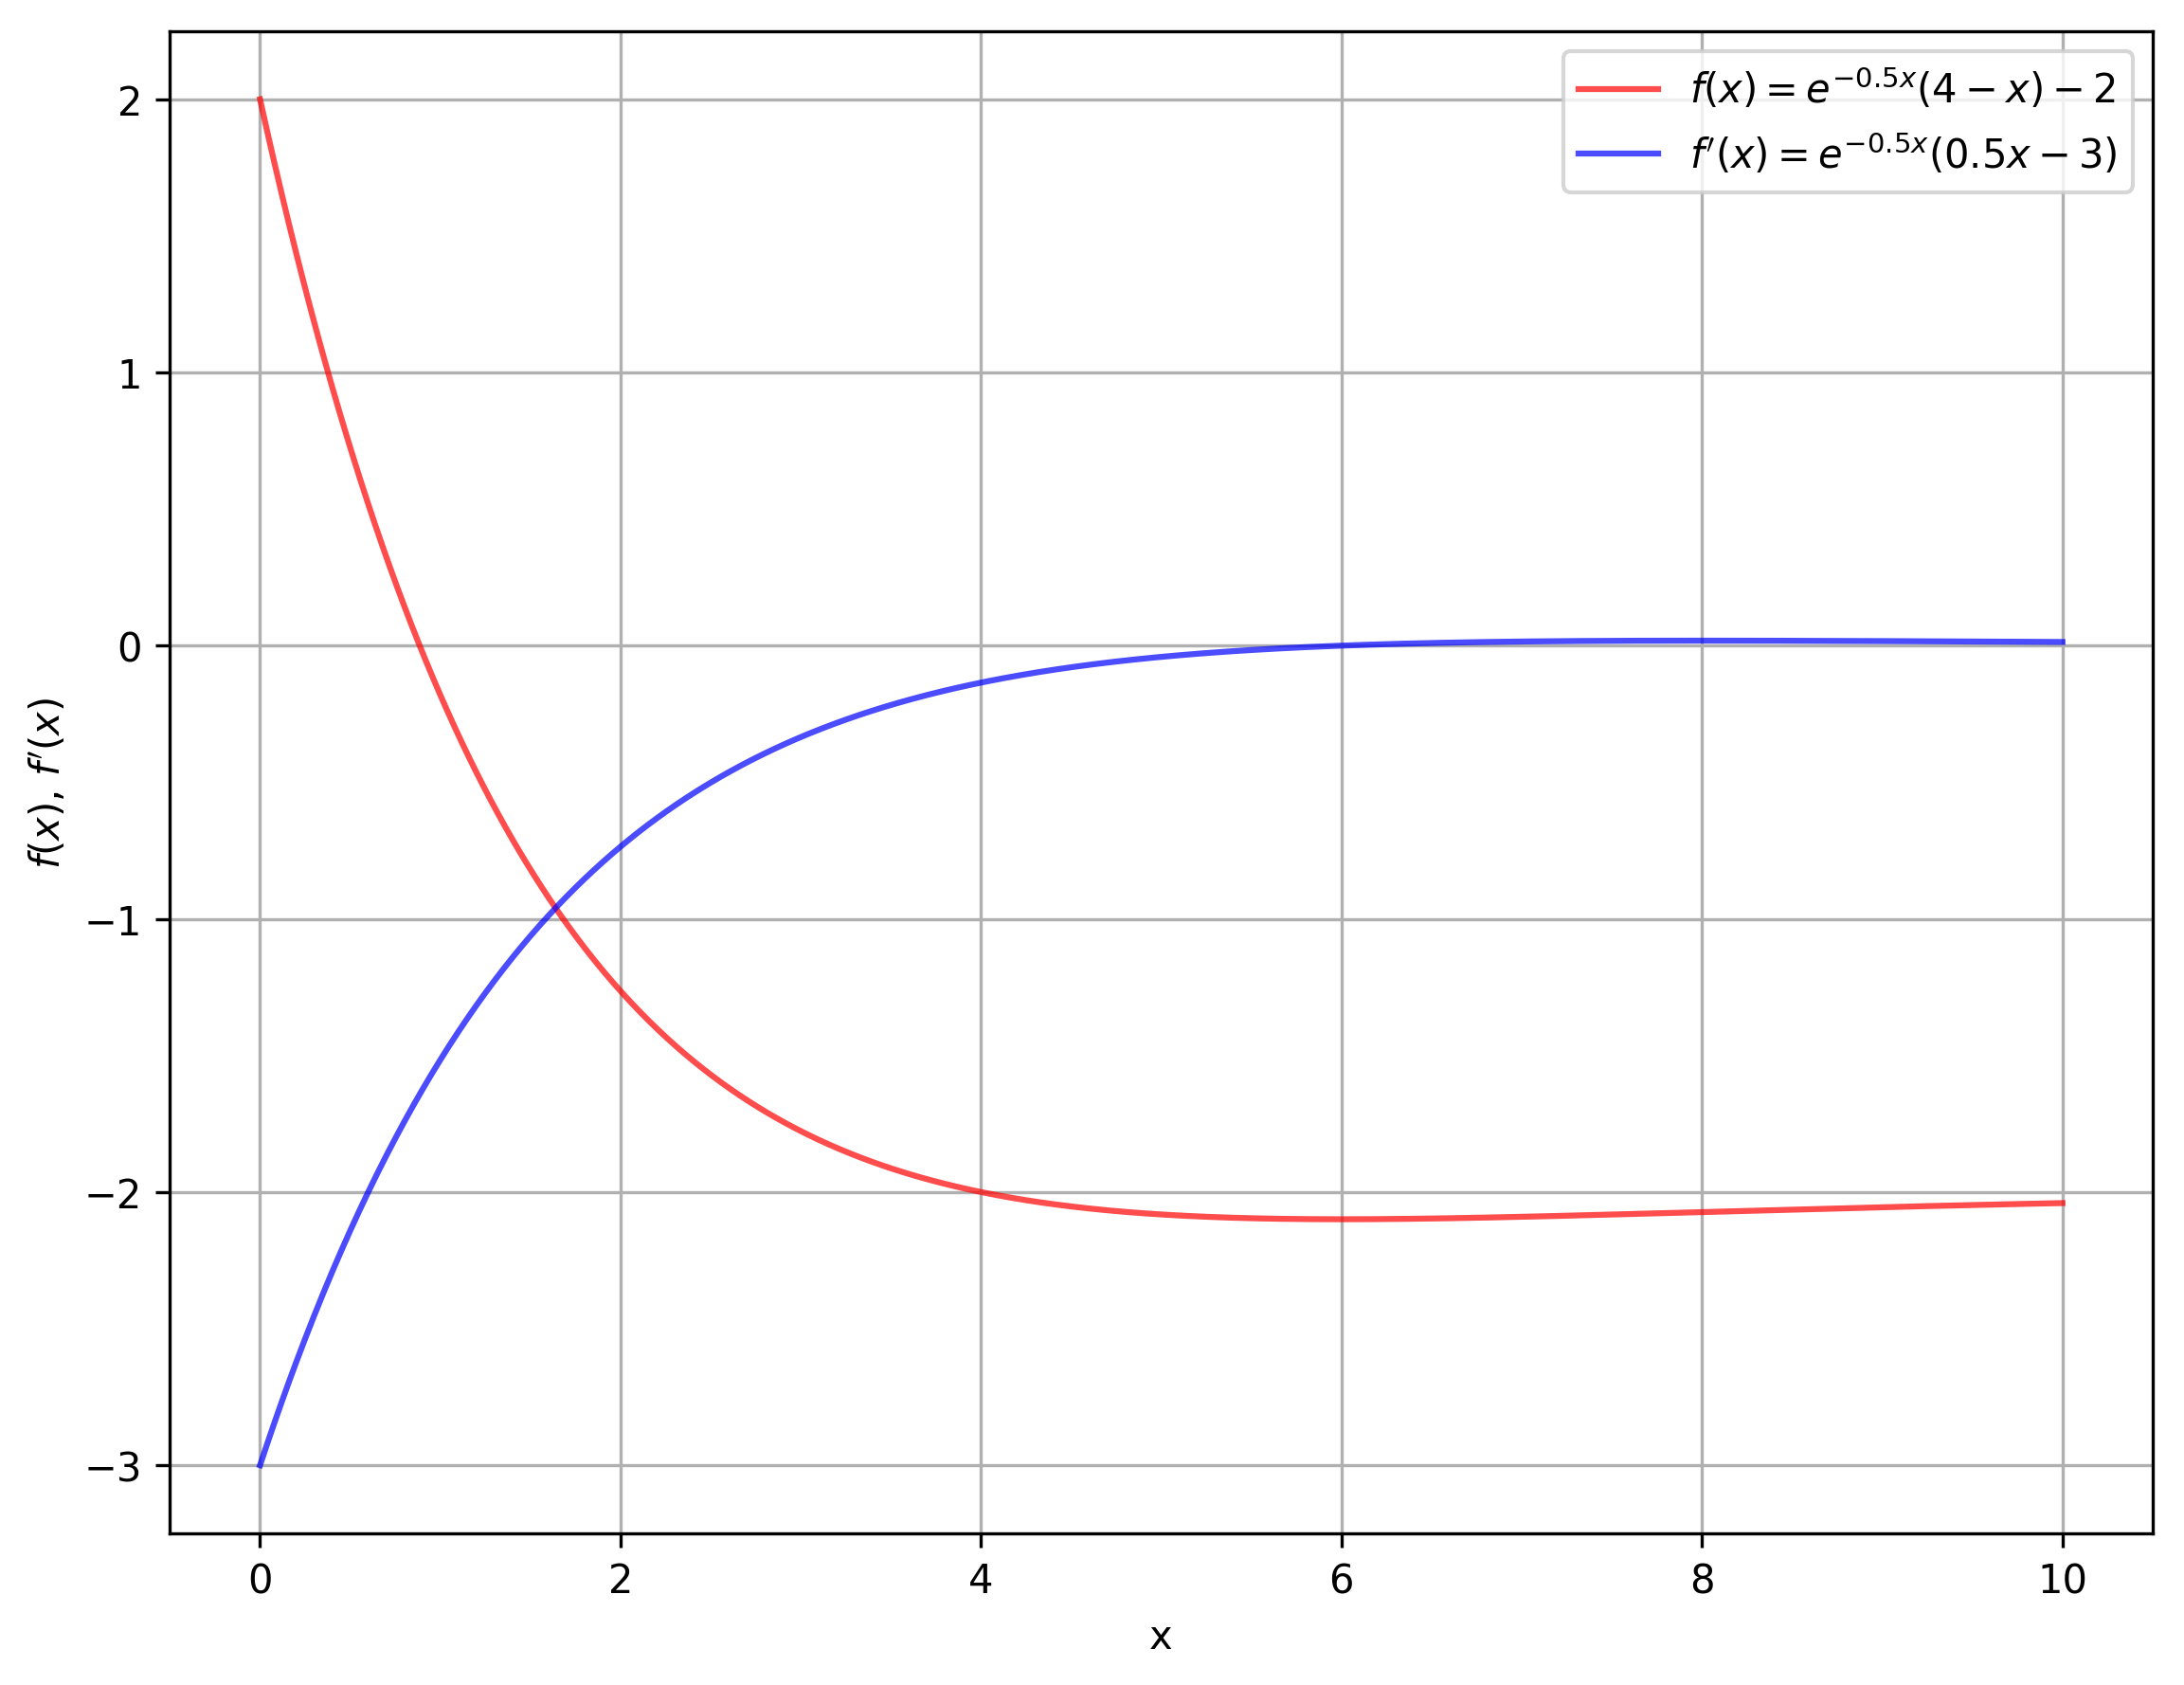

In [5]:
create_plot([np.arange(0, 10 + 0.01, 0.01)],
            [(f(np.arange(0, 10 + 0.01, 0.01)), f_prime(np.arange(0, 10 + 0.01, 0.01)))],
            ["x"], ["$f(x)$, $f'(x)$"],
            [("$f(x)=e^{-0.5x}(4-x)-2$", "$f'(x)=e^{-0.5x}(0.5x-3)$")], 1, size=(9, 7))

### Root of $f(x)$, Newton-Raphson Method

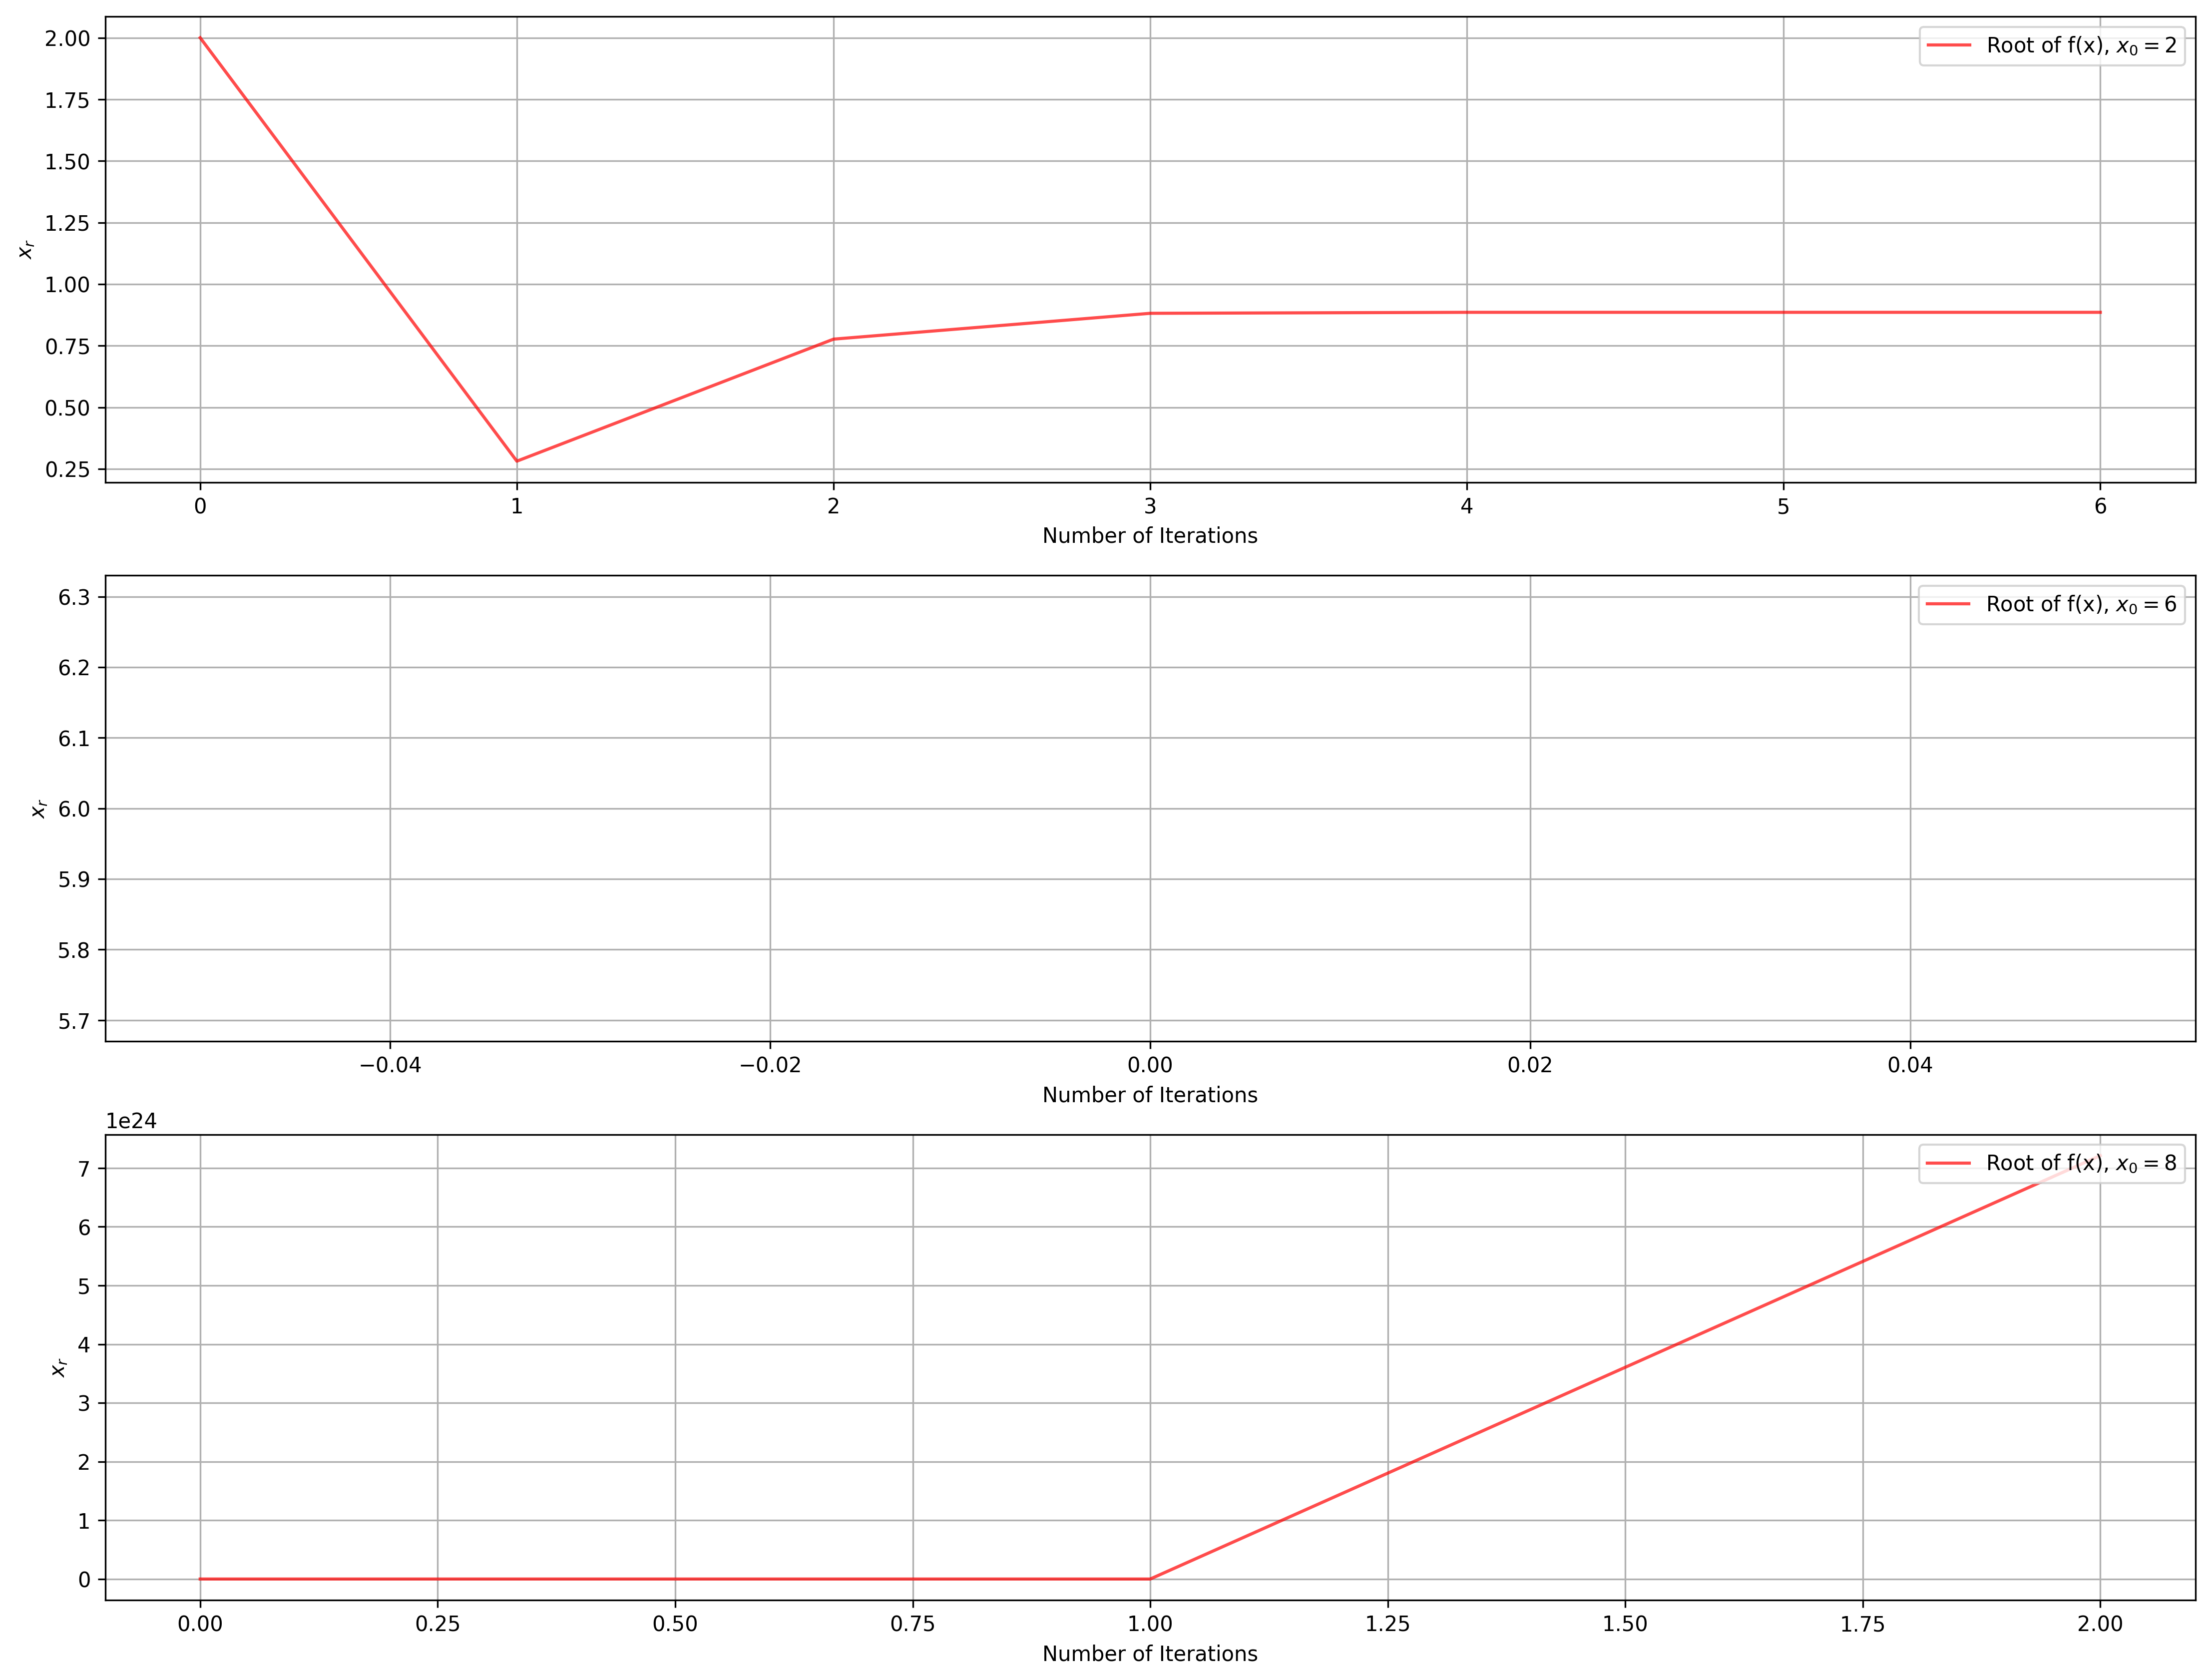

In [6]:
root_a, iters_a = newton_raphson(f, f_prime, 2)
root_b, iters_b = newton_raphson(f, f_prime, 6)
root_c, iters_c = newton_raphson(f, f_prime, 8)
create_plot([np.arange(iters_a+1), np.arange(iters_b+1), np.arange(iters_c+1)],
            [(root_a, ), (root_b, ), (root_c, )],
            ["Number of Iterations", "Number of Iterations", "Number of Iterations"],
            ["$x_r$", "$x_r$", "$x_r$"],
            [("Root of f(x), $x_0=2$", ), ("Root of f(x), $x_0=6$", ), ("Root of f(x), $x_0=8$", )], 3)

In [7]:
print ("Roots (a)\t Roots (b)\t Roots (c)")
print (np.c_[root_a, np.pad(root_b, (0, 6), 'constant'), np.pad(root_c, (0, 4), 'constant')])

Roots (a)	 Roots (b)	 Roots (c)
[[2.000000000000000e+00 6.000000000000000e+00 8.000000000000000e+00]
 [2.817181715409549e-01 0.000000000000000e+00 1.211963000662885e+02]
 [7.768868450453745e-01 0.000000000000000e+00 7.212131452880263e+24]
 [8.817078789285671e-01 0.000000000000000e+00 0.000000000000000e+00]
 [8.857032411666447e-01 0.000000000000000e+00 0.000000000000000e+00]
 [8.857088019940231e-01 0.000000000000000e+00 0.000000000000000e+00]
 [8.857088020047771e-01 0.000000000000000e+00 0.000000000000000e+00]]


As shown above, in the cases where the initial guess was either 6 or 8, the resulting root estimation was completely useless. With a guess of 6, the derivative of the function at 6 evaluates to 0, resulting in the algorithm completing it's root estimation immediately. For the guess of 8, the first iteration _does_ move closer to the actual root, but at the second step the derivative of the function at that point is so incredibly small (2.77e-25 in this case) that the resulting value is so large, causing the root estimation to __blow up__ to a value of 7.21e24. But, for the guess of 2, as shown in the first graph, this method finds the correct root in only 6 iterations.

### Root of $f(x)$, Two-Point Newton-Raphson Method

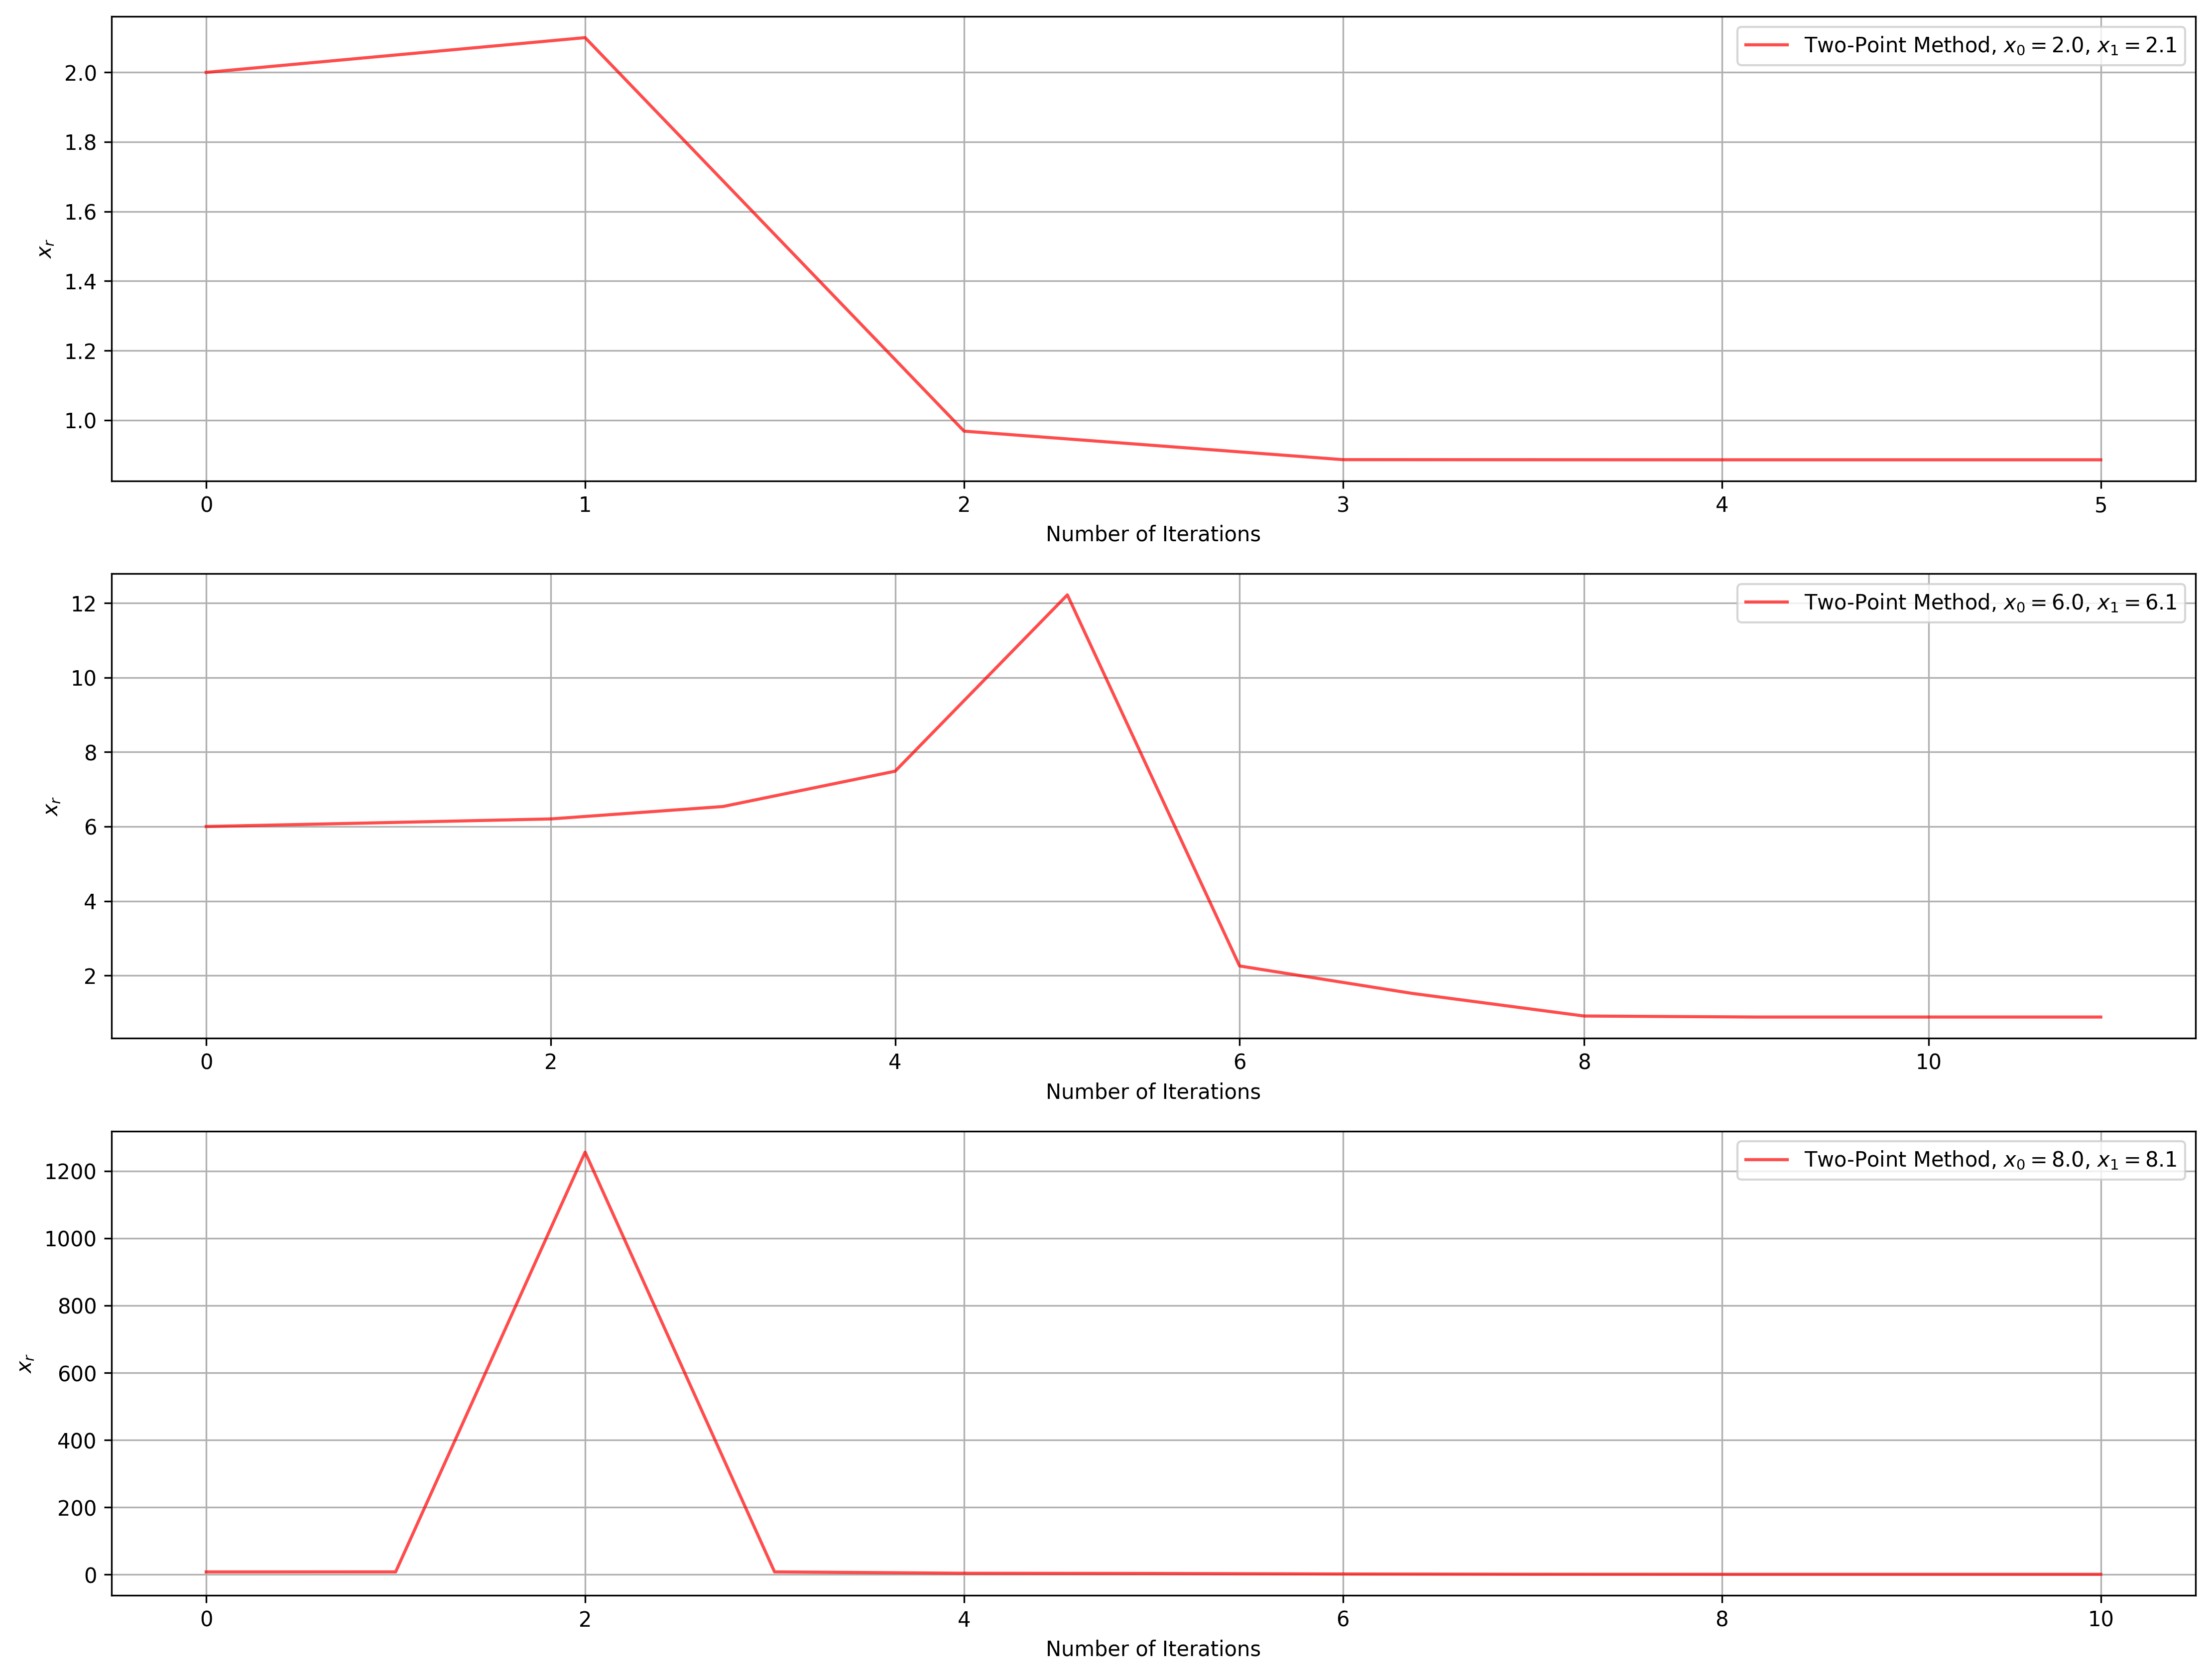

Root (a, 5 iterations): 0.8857088020047771959042393
Root (b, 11 iterations): 0.8857088020047771959042393
Root (c, 10 iterations): 0.8857088020047771959042393


In [8]:
two_a, two_iters_a = two_pt_newton_raphson(f, f_prime, 2.0, 2.1)
two_b, two_iters_b = two_pt_newton_raphson(f, f_prime, 6.0, 6.1)
two_c, two_iters_c = two_pt_newton_raphson(f, f_prime, 8.0, 8.1)

create_plot([np.arange(two_iters_a+2), np.arange(two_iters_b+2), np.arange(two_iters_c+2)],
            [(two_a, ), (two_b, ), (two_c, )],
            ["Number of Iterations", "Number of Iterations", "Number of Iterations"],
            ["$x_r$", "$x_r$", "$x_r$"],
            [("Two-Point Method, $x_0=2.0$, $x_1=2.1$", ),
             ("Two-Point Method, $x_0=6.0$, $x_1=6.1$", ),
             ("Two-Point Method, $x_0=8.0$, $x_1=8.1$", )], 3)
print ("Root (a, %i iterations): {0:.25f}\nRoot (b, %i iterations): {0:.25f}\nRoot (c, %i iterations): {0:.25f}".format(two_a[-1], two_b[-1], two_c[-1]) % (two_iters_a+1, two_iters_b+1, two_iters_c+1))

It is quite clear that, for this function, the two-point variant of the Newton-Raphson method is superior at finding the root. Due to either dividing by zero, or trunation errors resulting in very large numbers for $x_r$, the traditional method fails for both values of $x_0=6$ and $x_0=8$, while the two-point variant does not. Although, as the above graphs show, the two-point variant does have some instability at first, with root estimations as large as 12 for $x_0=6$ and 1200 for $x_0=8$, although they still converged in less than 15 iterations nonetheless. The results are impressive, but it is important to acknowledge how much more computationally expensive the two-point method is (as can be seen in the funcion defintion).